In [253]:
! pip install numpy pandas scikit-learn

In [254]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [255]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [256]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import accuracy_score  ,mean_squared_error



In [258]:
data=pd.read_csv('Titanic-Dataset.csv')

In [259]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
data.isnull().mean() *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [261]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

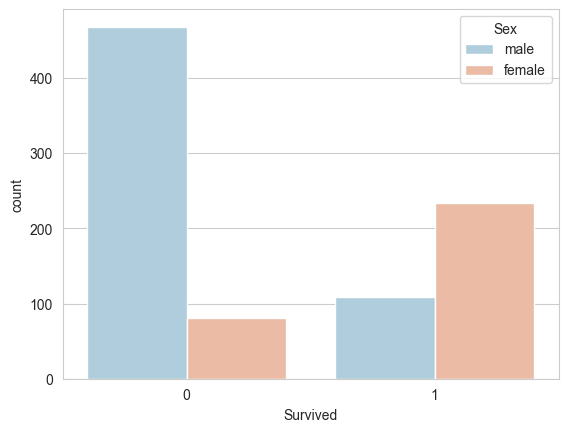

In [262]:
import seaborn as sns
sns.set_style('whitegrid')  # Fix the typo here
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')


<Axes: xlabel='Sex'>

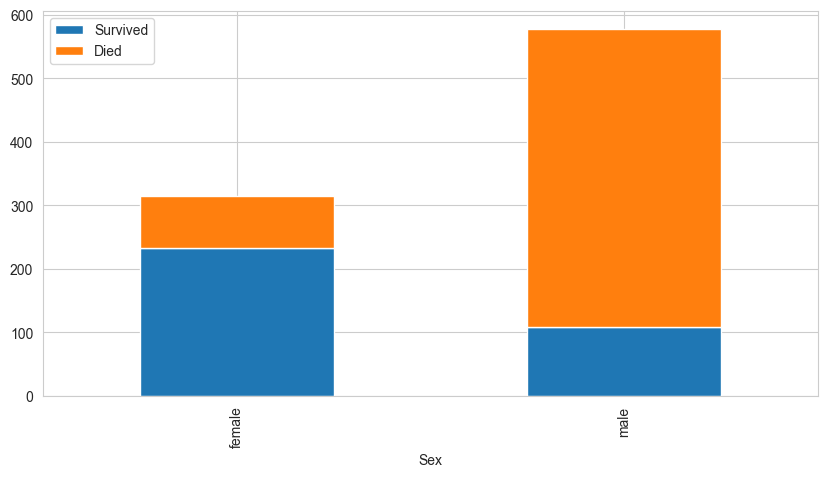

In [263]:
#Visualizing survivals based on gender
data['Died']=1-data['Survived']
data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(10,5),stacked=True)

In [264]:
data['Age'].shape

(891,)

In [265]:
# df=data['Age'].fillna().mean()
df = data['Age'].fillna(data['Age'].mean())


In [266]:
df

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [267]:
data['Cabin'].bfill()

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [268]:
data_copy=data.copy()


In [269]:
data_copy['Age']=data_copy['Age'].fillna(data['Age'].mean())

In [270]:
data_copy['Sex']=data_copy['Sex'].map({'male':1,'female':0})

In [271]:
data_copy['Cabin']=data_copy['Cabin'].bfill()

In [272]:
data_copy['Cabin']=data_copy['Cabin'].fillna('C85')

In [273]:
data_copy['Embarked']=data_copy['Embarked'].map({'S':0,'C':1,'Q':2})

In [274]:
data_copy['Embarked']=data_copy['Embarked'].astype('Int64')

In [275]:
data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C85,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C123,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,E46,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B42,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,C148,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,0


In [276]:
data_copy.isnull().mean()*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.224467
Died           0.000000
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

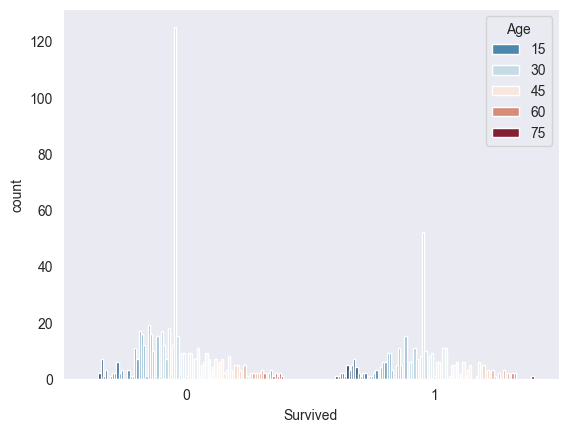

In [287]:
sns.set_style('dark')
sns.countplot(x='Survived',hue='Age',data=data_copy,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

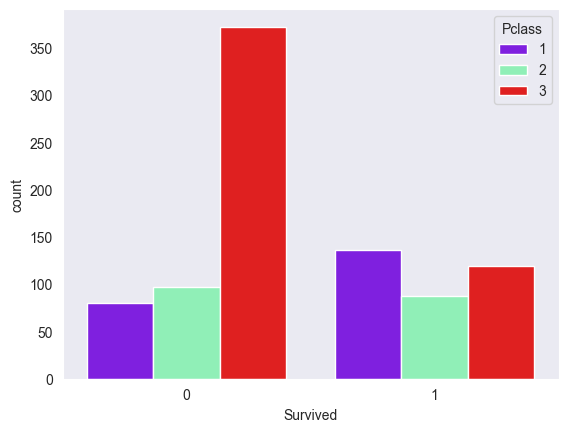

In [281]:
sns.set_style('dark')
sns.countplot(x='Survived',hue='Pclass',data=data_copy,palette='rainbow')

<Axes: >

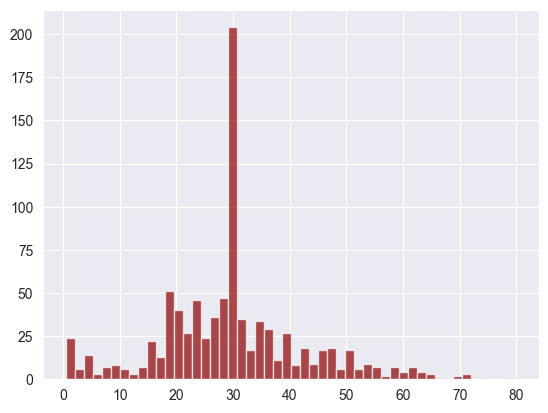

In [285]:
data_copy['Age'].hist(bins=50,color='darkred',alpha=0.7)